<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3_example_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Create a plot a sine function (using the CPU)

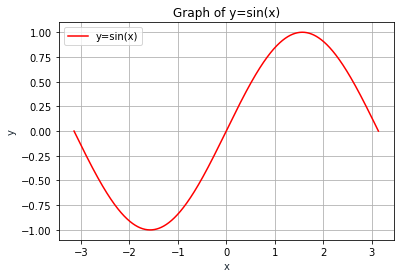

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
plt.plot(x.cpu(), y.cpu(), '-r', label='y=sin(x)')
plt.title('Graph of y=sin(x)')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Create a four-parameter polynomial to approximate a given function. This version of the code uses NN and SGD optimizer.

0 3221.32080078125


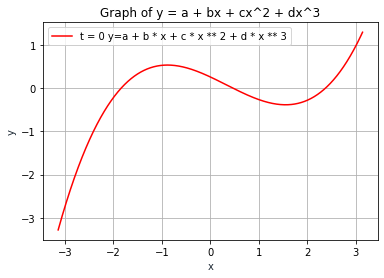

100 1391.454833984375
200 925.1995849609375
300 616.2706298828125
400 411.55413818359375
500 275.8758544921875


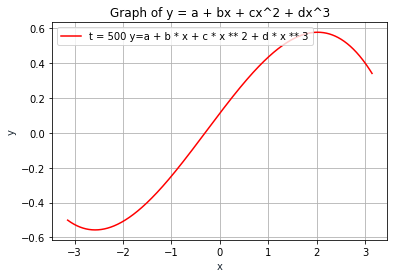

600 185.939697265625
700 126.3144302368164
800 86.77770233154297
900 60.55635070800781
1000 43.16264724731445


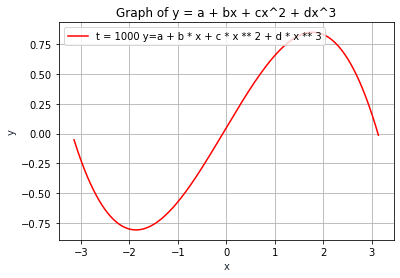

1100 31.622209548950195
1200 23.963539123535156
1300 18.879804611206055
1400 15.504402160644531
1500 13.262691497802734


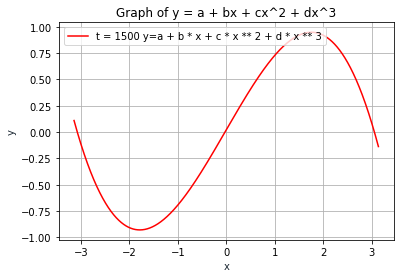

1600 11.77347183227539
1700 10.783848762512207
1800 10.125982284545898
1900 9.688549995422363
2000 9.39755630493164


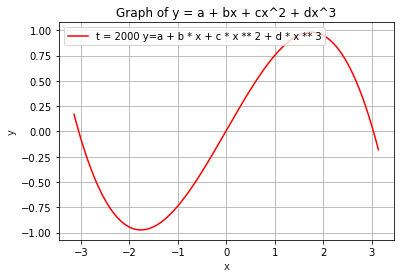

Result: y = 0.008455312810838223 + 0.8346468806266785 x + -0.0014586815377697349 x^2 + -0.09018771350383759 x^3


In [3]:
# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# the training loop
for t in range(2001):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 500 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='t = ' + str(t) + ' y=a + b * x + c * x ** 2 + d * x ** 3')
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')